<a href="https://colab.research.google.com/github/shreyzo/HandWrittenDigitRecognizer/blob/master/Handwritten_Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops


plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


In [0]:
def loaddataset():
    (trainX, trainy),  (testX, testy) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    #trainY = to_categorical(trainY)
    #testY = to_categorical(testY)
    return trainX, trainy, testX, testy

In [0]:
def linear_function():
    X = tf.constant(np.random.randn(3,1),name="X")
    W = tf.constant(np.random.randn(4,3),name="W")
    b = tf.constant(np.random.randn(4,1),name="b")
    Y = tf.add(tf.matmul(W,X),b)
    
    tf.compat.v1.disable_eager_execution() 
    sess = tf.compat.v1.Session()
    result = sess.run(Y)
    
    sess.close()
    
    return result

In [0]:
trainX, trainy, testX, testy = loaddataset()

In [0]:
def sigmoid(z):
    x = tf.compat.v1.placeholder(tf.float32, name="x")
    
    sigmoid = tf.sigmoid(x)
    
    with tf.compat.v1.Session() as sess:
        result= sess.run(sigmoid, feed_dict = {x:z})
    
    return result

In [0]:
def cost(logits, labels):
    z = tf.compat.v1.placeholder(tf.float32, name="z")
    y = tf.compat.v1.placeholder(tf.float32, name="y")
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
    
    with tf.compat.v1.Session() as sess:
        cost = sess.run(cost, feed_dict = {z:logits, y:labels})

    return cost

In [0]:
import h5py
import math

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 262144, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.compat.v1.placeholder("float", [784, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.compat.v1.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    

In [12]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name="C")
    
    one_hot_matrix = tf.one_hot(labels,C,axis=0)
 
    sess = tf.compat.v1.Session()
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    
    return one_hot

"""test: one_hot_matrix(labels, C)
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = \n" + str(one_hot))

output:
    one_hot = 
    [[ 0.  0.  0.  1.  0.  0.]
     [ 1.  0.  0.  0.  0.  1.]
     [ 0.  1.  0.  0.  1.  0.]
     [ 0.  0.  1.  0.  0.  0.]]
"""


'test: one_hot_matrix(labels, C)\nlabels = np.array([1,2,3,0,2,1])\none_hot = one_hot_matrix(labels, C = 4)\nprint ("one_hot = \n" + str(one_hot))\n\noutput:\n    one_hot = \n    [[ 0.  0.  0.  1.  0.  0.]\n     [ 1.  0.  0.  0.  0.  1.]\n     [ 0.  1.  0.  0.  1.  0.]\n     [ 0.  0.  1.  0.  0.  0.]]\n'

In [13]:
def ones(shape):
    ones = tf.ones(shape,name="ones")
    sess = tf.compat.v1.Session()
    ones = sess.run(ones)
    
    sess.close()
    
    return ones

"""test: ones(shape)
print ("ones = " + str(ones([3])))

output:
    ones = [ 1.  1.  1.]
"""


'test: ones(shape)\nprint ("ones = " + str(ones([3])))\n\noutput:\n    ones = [ 1.  1.  1.]\n'

In [15]:
print(testX.shape[0])
X_train_flatten = trainX.reshape(trainX.shape[0], -1).T
X_test_flatten = testX.reshape(testX.shape[0],-1).T
#Normalize
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
#Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(trainy, 10)  
Y_test = convert_to_one_hot(testy, 10)
  
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


10000
number of training examples = 60000
number of test examples = 10000
X_train shape: (784, 60000)
Y_train shape: (10, 60000)
X_test shape: (784, 10000)
Y_test shape: (10, 10000)


In [16]:
def create_placeholders(n_x, n_y):
    tf.compat.v1.disable_eager_execution()
    X = tf.compat.v1.placeholder(tf.float32,shape=(n_x,None),name="X")
    Y = tf.compat.v1.placeholder(tf.float32,shape=(n_y,None),name="Y")
    
    return X,Y

"""test: create_placeholder(n_x,n_y)
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

output:
    X = Tensor("X_3:0", shape=(12288, None), dtype=float32)
    Y = Tensor("Y_1:0", shape=(6, None), dtype=float32)
"""

'test: create_placeholder(n_x,n_y)\nX, Y = create_placeholders(12288, 6)\nprint ("X = " + str(X))\nprint ("Y = " + str(Y))\n\noutput:\n    X = Tensor("X_3:0", shape=(12288, None), dtype=float32)\n    Y = Tensor("Y_1:0", shape=(6, None), dtype=float32)\n'

In [17]:
def initialize_parameters():
    W1 = tf.compat.v1.get_variable("W1",[25,784],initializer = tf.keras.initializers.GlorotNormal(seed=1))
    b1 = tf.compat.v1.get_variable("b1",[25,1], initializer= tf.keras.initializers.Zeros())
    W2 = tf.compat.v1.get_variable("W2",[12,25],initializer = tf.keras.initializers.GlorotNormal(seed=1))
    b2 = tf.compat.v1.get_variable("b2",[12,1], initializer= tf.keras.initializers.Zeros())
    W3 = tf.compat.v1.get_variable("W3",[10,12],initializer = tf.keras.initializers.GlorotNormal(seed=1))
    b3 = tf.compat.v1.get_variable("b3",[10,1], initializer= tf.keras.initializers.Zeros())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

"""test: initialize_parameters()
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    
output: 
    W1 = <tf.Variable 'W1:0' shape=(25, 784) dtype=float32>
    b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
    W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
    b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32>
"""

'test: initialize_parameters()\ntf.compat.v1.reset_default_graph()\nwith tf.compat.v1.Session() as sess:\n    parameters = initialize_parameters()\n    print("W1 = " + str(parameters["W1"]))\n    print("b1 = " + str(parameters["b1"]))\n    print("W2 = " + str(parameters["W2"]))\n    print("b2 = " + str(parameters["b2"]))\n    \noutput: \n    W1 = <tf.Variable \'W1:0\' shape=(25, 784) dtype=float32>\n    b1 = <tf.Variable \'b1:0\' shape=(25, 1) dtype=float32>\n    W2 = <tf.Variable \'W2:0\' shape=(12, 25) dtype=float32>\n    b2 = <tf.Variable \'b2:0\' shape=(12, 1) dtype=float32>\n'

In [18]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)     
    
    return Z3

"""forward_propagation(X, parameters)
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))
    
output:
    Z3 = Tensor("Add_2:0", shape=(10, None), dtype=float32)
"""

'forward_propagation(X, parameters)\ntf.compat.v1.reset_default_graph()\n\nwith tf.compat.v1.Session() as sess:\n    X, Y = create_placeholders(784, 10)\n    parameters = initialize_parameters()\n    Z3 = forward_propagation(X, parameters)\n    print("Z3 = " + str(Z3))\n    \noutput:\n    Z3 = Tensor("Add_2:0", shape=(10, None), dtype=float32)\n'

In [19]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

"""test: compute_cost(Z3,Y)
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))
    
output:
    cost = Tensor("Mean:0", shape=(), dtype=float32)
"""

'test: compute_cost(Z3,Y)\ntf.compat.v1.reset_default_graph()\n\nwith tf.compat.v1.Session() as sess:\n    X, Y = create_placeholders(784, 10)\n    parameters = initialize_parameters()\n    Z3 = forward_propagation(X, parameters)\n    cost = compute_cost(Z3, Y)\n    print("cost = " + str(cost))\n    \noutput:\n    cost = Tensor("Mean:0", shape=(), dtype=float32)\n'

In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.001, num_epochs= 1500, minibatch_size=262144, print_cost=True):
    tf.compat.v1.reset_default_graph() 
    (n_x,m) = X_train.shape
    n_y = Y_train.shape[0]
    costs=[]
    
    X,Y = create_placeholders(n_x,n_y)
    
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X,parameters)
    
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.compat.v1.global_variables_initializer()
    
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
            
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y) = minibatch
                
                _ , minibatch_cost = sess.run([optimizer,cost], feed_dict={X:minibatch_X,Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / minibatch_size
                #print(epoch)
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
    


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Cost after epoch 0: 0.000009
Cost after epoch 100: 0.000002
Cost after epoch 200: 0.000001
Cost after epoch 300: 0.000001
Cost after epoch 400: 0.000001
Cost after epoch 500: 0.000001
Cost after epoch 600: 0.000001
Cost after epoch 700: 0.000000
Cost after epoch 800: 0.000000
Cost after epoch 900: 0.000000
Cost after epoch 1000: 0.000000
Cost after epoch 1100: 0.000000
Cost after epoch 1200: 0.000000
Cost after epoch 1300: 0.000000
Cost after epoch 1400: 0.000000


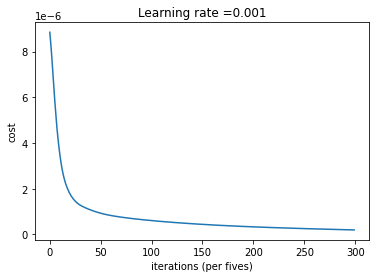

Parameters have been trained!
Train Accuracy: 0.9865
Test Accuracy: 0.9593


In [21]:
parameters = model(X_train, Y_train, X_test, Y_test)